# <span style="font-size: 30px; color: #000000; ; font-weight: bold;">Exploratory Data Analysis on the Australian Black Summer Bush Fires using NASA satellite data</span>

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Importing the necessary libraries

In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import pytz
from timezonefinder import TimezoneFinder 
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import HeatMapWithTime

In [2]:
ls

aus_fire_env/     fire_data/        states_shapefile/
eda.ipynb         requirements.txt


In [3]:
df = pd.DataFrame()

In [4]:
files = os.listdir('./fire_data')
files = sorted(files)
print(files)

['modis_2019_Australia.csv', 'modis_2020_Australia.csv']


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Concatenating all the data files into one dataframe

In [5]:
for file in files:
    file_path = './fire_data/' + file
    temp = pd.read_csv(file_path)
    df = pd.concat([df, temp], ignore_index=True)

In [6]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-13.9873,127.3882,324.2,2.6,1.5,2019-01-01,122,Terra,MODIS,39,6.03,294.8,31.0,D,0
1,-13.9916,127.4121,327.4,2.6,1.5,2019-01-01,122,Terra,MODIS,61,6.03,295.5,45.0,D,0
2,-14.0055,127.4097,328.8,2.6,1.5,2019-01-01,122,Terra,MODIS,27,6.03,295.8,44.1,D,0
3,-14.1017,127.4337,334.9,2.6,1.5,2019-01-01,122,Terra,MODIS,86,6.03,292.9,83.1,D,0
4,-14.0012,127.3857,349.5,2.6,1.5,2019-01-01,122,Terra,MODIS,83,6.03,296.3,182.4,D,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466008 entries, 0 to 466007
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    466008 non-null  float64
 1   longitude   466008 non-null  float64
 2   brightness  466008 non-null  float64
 3   scan        466008 non-null  float64
 4   track       466008 non-null  float64
 5   acq_date    466008 non-null  object 
 6   acq_time    466008 non-null  int64  
 7   satellite   466008 non-null  object 
 8   instrument  466008 non-null  object 
 9   confidence  466008 non-null  int64  
 10  version     466008 non-null  float64
 11  bright_t31  466008 non-null  float64
 12  frp         466008 non-null  float64
 13  daynight    466008 non-null  object 
 14  type        466008 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 53.3+ MB


In [8]:
df.isna().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Renaming the brightness column

In [10]:
df.rename(columns={'brightness':'fire_px_temp'}, inplace=True)

In [11]:
df.head()

,latitude,longitude,fire_px_temp,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-13.9873,127.3882,324.2,2.6,1.5,2019-01-01,122,Terra,MODIS,39,6.03,294.8,31.0,D,0
1,-13.9916,127.4121,327.4,2.6,1.5,2019-01-01,122,Terra,MODIS,61,6.03,295.5,45.0,D,0
2,-14.0055,127.4097,328.8,2.6,1.5,2019-01-01,122,Terra,MODIS,27,6.03,295.8,44.1,D,0
3,-14.1017,127.4337,334.9,2.6,1.5,2019-01-01,122,Terra,MODIS,86,6.03,292.9,83.1,D,0
4,-14.0012,127.3857,349.5,2.6,1.5,2019-01-01,122,Terra,MODIS,83,6.03,296.3,182.4,D,0


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Converting the fire_px_temp column from Kelvin to Celcius

In [12]:
df['fire_px_temp'] = df['fire_px_temp'] - 273.15

In [13]:
df.head()

,latitude,longitude,fire_px_temp,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-13.9873,127.3882,51.05,2.6,1.5,2019-01-01,122,Terra,MODIS,39,6.03,294.8,31.0,D,0
1,-13.9916,127.4121,54.25,2.6,1.5,2019-01-01,122,Terra,MODIS,61,6.03,295.5,45.0,D,0
2,-14.0055,127.4097,55.65,2.6,1.5,2019-01-01,122,Terra,MODIS,27,6.03,295.8,44.1,D,0
3,-14.1017,127.4337,61.75,2.6,1.5,2019-01-01,122,Terra,MODIS,86,6.03,292.9,83.1,D,0
4,-14.0012,127.3857,76.35,2.6,1.5,2019-01-01,122,Terra,MODIS,83,6.03,296.3,182.4,D,0


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Dropping the scan and track columns

In [14]:
df.drop(columns=['scan', 'track'], inplace=True)

In [15]:
df.head()

,latitude,longitude,fire_px_temp,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-13.9873,127.3882,51.05,2019-01-01,122,Terra,MODIS,39,6.03,294.8,31.0,D,0
1,-13.9916,127.4121,54.25,2019-01-01,122,Terra,MODIS,61,6.03,295.5,45.0,D,0
2,-14.0055,127.4097,55.65,2019-01-01,122,Terra,MODIS,27,6.03,295.8,44.1,D,0
3,-14.1017,127.4337,61.75,2019-01-01,122,Terra,MODIS,86,6.03,292.9,83.1,D,0
4,-14.0012,127.3857,76.35,2019-01-01,122,Terra,MODIS,83,6.03,296.3,182.4,D,0


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Converting acq_time column to string data type

In [16]:
df['acq_time'] = df['acq_time'].astype('str')

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Padding the acq_time column with leading zeros so that its total length is 4 characters

In [17]:
df['acq_time'] = df['acq_time'].str.zfill(4)

In [18]:
df.head()

,latitude,longitude,fire_px_temp,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-13.9873,127.3882,51.05,2019-01-01,0122,Terra,MODIS,39,6.03,294.8,31.0,D,0
1,-13.9916,127.4121,54.25,2019-01-01,0122,Terra,MODIS,61,6.03,295.5,45.0,D,0
2,-14.0055,127.4097,55.65,2019-01-01,0122,Terra,MODIS,27,6.03,295.8,44.1,D,0
3,-14.1017,127.4337,61.75,2019-01-01,0122,Terra,MODIS,86,6.03,292.9,83.1,D,0
4,-14.0012,127.3857,76.35,2019-01-01,0122,Terra,MODIS,83,6.03,296.3,182.4,D,0


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Converting the acq_time column into a proper time representation

In [19]:
df['acq_time'] = df['acq_time'].str[:2] + ':' + df['acq_time'].str[2:]

In [20]:
df.head()

,latitude,longitude,fire_px_temp,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-13.9873,127.3882,51.05,2019-01-01,01:22,Terra,MODIS,39,6.03,294.8,31.0,D,0
1,-13.9916,127.4121,54.25,2019-01-01,01:22,Terra,MODIS,61,6.03,295.5,45.0,D,0
2,-14.0055,127.4097,55.65,2019-01-01,01:22,Terra,MODIS,27,6.03,295.8,44.1,D,0
3,-14.1017,127.4337,61.75,2019-01-01,01:22,Terra,MODIS,86,6.03,292.9,83.1,D,0
4,-14.0012,127.3857,76.35,2019-01-01,01:22,Terra,MODIS,83,6.03,296.3,182.4,D,0


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Creating the acq_datetime column

In [21]:
df['acq_datetime'] = df['acq_date'] + ' ' + df['acq_time']

In [22]:
df.head()

,latitude,longitude,fire_px_temp,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,acq_datetime
0,-13.9873,127.3882,51.05,2019-01-01,01:22,Terra,MODIS,39,6.03,294.8,31.0,D,0,2019-01-01 01:22
1,-13.9916,127.4121,54.25,2019-01-01,01:22,Terra,MODIS,61,6.03,295.5,45.0,D,0,2019-01-01 01:22
2,-14.0055,127.4097,55.65,2019-01-01,01:22,Terra,MODIS,27,6.03,295.8,44.1,D,0,2019-01-01 01:22
3,-14.1017,127.4337,61.75,2019-01-01,01:22,Terra,MODIS,86,6.03,292.9,83.1,D,0,2019-01-01 01:22
4,-14.0012,127.3857,76.35,2019-01-01,01:22,Terra,MODIS,83,6.03,296.3,182.4,D,0,2019-01-01 01:22


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Converting the acq_datetime column into a datetime format

In [23]:
df['acq_datetime'] = pd.to_datetime(df['acq_datetime'])

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Dropping the acq_time and acq_date columns

In [24]:
df.drop(columns=['acq_date', 'acq_time'], inplace=True)

In [25]:
df.head()

,latitude,longitude,fire_px_temp,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,acq_datetime
0,-13.9873,127.3882,51.05,Terra,MODIS,39,6.03,294.8,31.0,D,0,2019-01-01 01:22:00
1,-13.9916,127.4121,54.25,Terra,MODIS,61,6.03,295.5,45.0,D,0,2019-01-01 01:22:00
2,-14.0055,127.4097,55.65,Terra,MODIS,27,6.03,295.8,44.1,D,0,2019-01-01 01:22:00
3,-14.1017,127.4337,61.75,Terra,MODIS,86,6.03,292.9,83.1,D,0,2019-01-01 01:22:00
4,-14.0012,127.3857,76.35,Terra,MODIS,83,6.03,296.3,182.4,D,0,2019-01-01 01:22:00


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Using timezonefinder to get the timezone of each location

In [26]:
tf = TimezoneFinder()

def timezone_finder(row):
    latitude = row['latitude']
    longitude = row['longitude']
    return tf.timezone_at(lat=latitude, lng=longitude)

tqdm.pandas()

df['timezone'] = df.progress_apply(timezone_finder, axis=1)

  0%|          | 0/466008 [00:00<?, ?it/s]

In [27]:
df.head()

,latitude,longitude,fire_px_temp,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,acq_datetime,timezone
0,-13.9873,127.3882,51.05,Terra,MODIS,39,6.03,294.8,31.0,D,0,2019-01-01 01:22:00,Australia/Perth
1,-13.9916,127.4121,54.25,Terra,MODIS,61,6.03,295.5,45.0,D,0,2019-01-01 01:22:00,Australia/Perth
2,-14.0055,127.4097,55.65,Terra,MODIS,27,6.03,295.8,44.1,D,0,2019-01-01 01:22:00,Australia/Perth
3,-14.1017,127.4337,61.75,Terra,MODIS,86,6.03,292.9,83.1,D,0,2019-01-01 01:22:00,Australia/Perth
4,-14.0012,127.3857,76.35,Terra,MODIS,83,6.03,296.3,182.4,D,0,2019-01-01 01:22:00,Australia/Perth


In [28]:
df['timezone'].unique()

array(['Australia/Perth', 'Australia/Brisbane', 'Australia/Darwin',
       'Australia/Melbourne', 'Australia/Sydney', 'Australia/Adelaide',
       'Australia/Hobart', 'Australia/Eucla', 'Australia/Broken_Hill',
       'Australia/Lindeman'], dtype=object)

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Using the timezone column to create the ground_datetime column as acq_datetime is in UTC format

In [29]:
def local_datetime_finder(row):
    timezone = row['timezone']
    acq_datetime = row['acq_datetime']
    local_datetime = acq_datetime.tz_localize('UTC').astimezone(timezone).replace(tzinfo=None)
    return local_datetime
    

In [30]:
df['ground_datetime'] = df.apply(local_datetime_finder, axis=1)

In [31]:
df.head()

,latitude,longitude,fire_px_temp,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,acq_datetime,timezone,ground_datetime
0,-13.9873,127.3882,51.05,Terra,MODIS,39,6.03,294.8,31.0,D,0,2019-01-01 01:22:00,Australia/Perth,2019-01-01 09:22:00
1,-13.9916,127.4121,54.25,Terra,MODIS,61,6.03,295.5,45.0,D,0,2019-01-01 01:22:00,Australia/Perth,2019-01-01 09:22:00
2,-14.0055,127.4097,55.65,Terra,MODIS,27,6.03,295.8,44.1,D,0,2019-01-01 01:22:00,Australia/Perth,2019-01-01 09:22:00
3,-14.1017,127.4337,61.75,Terra,MODIS,86,6.03,292.9,83.1,D,0,2019-01-01 01:22:00,Australia/Perth,2019-01-01 09:22:00
4,-14.0012,127.3857,76.35,Terra,MODIS,83,6.03,296.3,182.4,D,0,2019-01-01 01:22:00,Australia/Perth,2019-01-01 09:22:00


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Creating the ground_date column

In [32]:
df['ground_date'] = df['ground_datetime'].dt.date

In [33]:
df['ground_date'] = pd.to_datetime(df['ground_date'])

In [34]:
df.head()

,latitude,longitude,fire_px_temp,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,acq_datetime,timezone,ground_datetime,ground_date
0,-13.9873,127.3882,51.05,Terra,MODIS,39,6.03,294.8,31.0,D,0,2019-01-01 01:22:00,Australia/Perth,2019-01-01 09:22:00,2019-01-01
1,-13.9916,127.4121,54.25,Terra,MODIS,61,6.03,295.5,45.0,D,0,2019-01-01 01:22:00,Australia/Perth,2019-01-01 09:22:00,2019-01-01
2,-14.0055,127.4097,55.65,Terra,MODIS,27,6.03,295.8,44.1,D,0,2019-01-01 01:22:00,Australia/Perth,2019-01-01 09:22:00,2019-01-01
3,-14.1017,127.4337,61.75,Terra,MODIS,86,6.03,292.9,83.1,D,0,2019-01-01 01:22:00,Australia/Perth,2019-01-01 09:22:00,2019-01-01
4,-14.0012,127.3857,76.35,Terra,MODIS,83,6.03,296.3,182.4,D,0,2019-01-01 01:22:00,Australia/Perth,2019-01-01 09:22:00,2019-01-01


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Creating the ground_month column

In [35]:
df['ground_month'] = df['ground_date'].dt.month_name()

In [36]:
df.head()

,latitude,longitude,fire_px_temp,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,acq_datetime,timezone,ground_datetime,ground_date,ground_month
0,-13.9873,127.3882,51.05,Terra,MODIS,39,6.03,294.8,31.0,D,0,2019-01-01 01:22:00,Australia/Perth,2019-01-01 09:22:00,2019-01-01,January
1,-13.9916,127.4121,54.25,Terra,MODIS,61,6.03,295.5,45.0,D,0,2019-01-01 01:22:00,Australia/Perth,2019-01-01 09:22:00,2019-01-01,January
2,-14.0055,127.4097,55.65,Terra,MODIS,27,6.03,295.8,44.1,D,0,2019-01-01 01:22:00,Australia/Perth,2019-01-01 09:22:00,2019-01-01,January
3,-14.1017,127.4337,61.75,Terra,MODIS,86,6.03,292.9,83.1,D,0,2019-01-01 01:22:00,Australia/Perth,2019-01-01 09:22:00,2019-01-01,January
4,-14.0012,127.3857,76.35,Terra,MODIS,83,6.03,296.3,182.4,D,0,2019-01-01 01:22:00,Australia/Perth,2019-01-01 09:22:00,2019-01-01,January


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Filtering the data to only include data from 01st of September 2019 to 29th of February 2020 (black summer fires)

In [37]:
filt = (df['ground_date'] >= pd.to_datetime('2019-09-01')) & (df['ground_date'] <= pd.to_datetime('2020-02-29'))
df = df.loc[filt, :]

In [38]:
df.head()

,latitude,longitude,fire_px_temp,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,acq_datetime,timezone,ground_datetime,ground_date,ground_month
133470,-12.5133,133.8844,36.35,Aqua,MODIS,78,6.03,294.9,9.1,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133471,-12.5119,133.8749,37.15,Aqua,MODIS,80,6.03,294.8,9.5,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133472,-12.4801,133.8507,30.35,Aqua,MODIS,40,6.03,292.9,5.0,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133473,-12.4786,133.8412,29.55,Aqua,MODIS,43,6.03,292.1,4.9,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133474,-15.7780,130.2920,42.25,Aqua,MODIS,40,6.03,292.9,21.1,N,0,2019-08-31 16:28:00,Australia/Darwin,2019-09-01 01:58:00,2019-09-01,September


In [39]:
len(df)

220824

In [40]:
df['satellite'].unique()

array(['Aqua', 'Terra'], dtype=object)

In [41]:
df['instrument'].unique()

array(['MODIS'], dtype=object)

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Dropping the instrument column

In [42]:
df.drop(columns=['instrument'], inplace=True)

In [43]:
df.head()

,latitude,longitude,fire_px_temp,satellite,confidence,version,bright_t31,frp,daynight,type,acq_datetime,timezone,ground_datetime,ground_date,ground_month
133470,-12.5133,133.8844,36.35,Aqua,78,6.03,294.9,9.1,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133471,-12.5119,133.8749,37.15,Aqua,80,6.03,294.8,9.5,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133472,-12.4801,133.8507,30.35,Aqua,40,6.03,292.9,5.0,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133473,-12.4786,133.8412,29.55,Aqua,43,6.03,292.1,4.9,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133474,-15.7780,130.2920,42.25,Aqua,40,6.03,292.9,21.1,N,0,2019-08-31 16:28:00,Australia/Darwin,2019-09-01 01:58:00,2019-09-01,September


In [44]:
df['version'].unique()

array([6.03])

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Dropping the version column

In [45]:
df.drop(columns=['version'], inplace=True)

In [46]:
df.head()

,latitude,longitude,fire_px_temp,satellite,confidence,bright_t31,frp,daynight,type,acq_datetime,timezone,ground_datetime,ground_date,ground_month
133470,-12.5133,133.8844,36.35,Aqua,78,294.9,9.1,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133471,-12.5119,133.8749,37.15,Aqua,80,294.8,9.5,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133472,-12.4801,133.8507,30.35,Aqua,40,292.9,5.0,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133473,-12.4786,133.8412,29.55,Aqua,43,292.1,4.9,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133474,-15.7780,130.2920,42.25,Aqua,40,292.9,21.1,N,0,2019-08-31 16:28:00,Australia/Darwin,2019-09-01 01:58:00,2019-09-01,September


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Renaming the bright_t31 column

In [47]:
df.rename(columns={'bright_t31':'surround_temp'}, inplace=True)

In [48]:
df.head()

,latitude,longitude,fire_px_temp,satellite,confidence,surround_temp,frp,daynight,type,acq_datetime,timezone,ground_datetime,ground_date,ground_month
133470,-12.5133,133.8844,36.35,Aqua,78,294.9,9.1,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133471,-12.5119,133.8749,37.15,Aqua,80,294.8,9.5,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133472,-12.4801,133.8507,30.35,Aqua,40,292.9,5.0,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133473,-12.4786,133.8412,29.55,Aqua,43,292.1,4.9,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133474,-15.7780,130.2920,42.25,Aqua,40,292.9,21.1,N,0,2019-08-31 16:28:00,Australia/Darwin,2019-09-01 01:58:00,2019-09-01,September


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Converting the surround_temp column from Kelvin to Celcius

In [49]:
df['surround_temp'] = df['surround_temp'] - 273.15

In [50]:
df.head()

,latitude,longitude,fire_px_temp,satellite,confidence,surround_temp,frp,daynight,type,acq_datetime,timezone,ground_datetime,ground_date,ground_month
133470,-12.5133,133.8844,36.35,Aqua,78,21.75,9.1,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133471,-12.5119,133.8749,37.15,Aqua,80,21.65,9.5,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133472,-12.4801,133.8507,30.35,Aqua,40,19.75,5.0,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133473,-12.4786,133.8412,29.55,Aqua,43,18.95,4.9,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133474,-15.7780,130.2920,42.25,Aqua,40,19.75,21.1,N,0,2019-08-31 16:28:00,Australia/Darwin,2019-09-01 01:58:00,2019-09-01,September


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Renaming the frp column

In [51]:
df.rename(columns={'frp':'radiative_power'}, inplace=True)

In [52]:
df.head()

,latitude,longitude,fire_px_temp,satellite,confidence,surround_temp,radiative_power,daynight,type,acq_datetime,timezone,ground_datetime,ground_date,ground_month
133470,-12.5133,133.8844,36.35,Aqua,78,21.75,9.1,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133471,-12.5119,133.8749,37.15,Aqua,80,21.65,9.5,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133472,-12.4801,133.8507,30.35,Aqua,40,19.75,5.0,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133473,-12.4786,133.8412,29.55,Aqua,43,18.95,4.9,N,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133474,-15.7780,130.2920,42.25,Aqua,40,19.75,21.1,N,0,2019-08-31 16:28:00,Australia/Darwin,2019-09-01 01:58:00,2019-09-01,September


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Formatting the values in the daynight column

In [53]:
df['daynight'] = df['daynight'].replace({'D':'day', 'N':'night'})

In [54]:
df.head()

,latitude,longitude,fire_px_temp,satellite,confidence,surround_temp,radiative_power,daynight,type,acq_datetime,timezone,ground_datetime,ground_date,ground_month
133470,-12.5133,133.8844,36.35,Aqua,78,21.75,9.1,night,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133471,-12.5119,133.8749,37.15,Aqua,80,21.65,9.5,night,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133472,-12.4801,133.8507,30.35,Aqua,40,19.75,5.0,night,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133473,-12.4786,133.8412,29.55,Aqua,43,18.95,4.9,night,0,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133474,-15.7780,130.2920,42.25,Aqua,40,19.75,21.1,night,0,2019-08-31 16:28:00,Australia/Darwin,2019-09-01 01:58:00,2019-09-01,September


In [55]:
df['type'].unique()

array([0, 2, 3])

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Formatting the values in the type column

In [56]:
df['type'] = df['type'].replace({0:'presumed vegetation fire', 2:'other static land source', 3:' offshore'})

In [57]:
df.head()

,latitude,longitude,fire_px_temp,satellite,confidence,surround_temp,radiative_power,daynight,type,acq_datetime,timezone,ground_datetime,ground_date,ground_month
133470,-12.5133,133.8844,36.35,Aqua,78,21.75,9.1,night,presumed vegetation fire,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133471,-12.5119,133.8749,37.15,Aqua,80,21.65,9.5,night,presumed vegetation fire,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133472,-12.4801,133.8507,30.35,Aqua,40,19.75,5.0,night,presumed vegetation fire,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133473,-12.4786,133.8412,29.55,Aqua,43,18.95,4.9,night,presumed vegetation fire,2019-08-31 16:27:00,Australia/Darwin,2019-09-01 01:57:00,2019-09-01,September
133474,-15.7780,130.2920,42.25,Aqua,40,19.75,21.1,night,presumed vegetation fire,2019-08-31 16:28:00,Australia/Darwin,2019-09-01 01:58:00,2019-09-01,September


<p style="font-size: 16px; color: #000000; font-weight: bold;">
    Creating a state column using an australian states and territories shape file

In [58]:
aus_states = gpd.read_file("states_shapefile/STE_2021_AUST_GDA2020.shp")
aus_states.head()

,STE_CODE21,STE_NAME21,CHG_FLAG21,CHG_LBL21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
0,1,New South Wales,0,No change,AUS,Australia,8.007977e+05,http://linked.data.gov.au/dataset/asgsed3/STE/1,"MULTIPOLYGON (((159.0623 -31.50886, 159.06218 ..."
1,2,Victoria,0,No change,AUS,Australia,2.274962e+05,http://linked.data.gov.au/dataset/asgsed3/STE/2,"MULTIPOLYGON (((146.29286 -39.15778, 146.29341..."
2,3,Queensland,0,No change,AUS,Australia,1.730171e+06,http://linked.data.gov.au/dataset/asgsed3/STE/3,"MULTIPOLYGON (((142.5314 -10.68301, 142.53072 ..."
3,4,South Australia,0,No change,AUS,Australia,9.842314e+05,http://linked.data.gov.au/dataset/asgsed3/STE/4,"MULTIPOLYGON (((140.66025 -38.06256, 140.66006..."
4,5,Western Australia,0,No change,AUS,Australia,2.526632e+06,http://linked.data.gov.au/dataset/asgsed3/STE/5,"MULTIPOLYGON (((117.86953 -35.19108, 117.86961..."


In [59]:
aus_states.isna().sum()

STE_CODE21    0
STE_NAME21    0
CHG_FLAG21    0
CHG_LBL21     0
AUS_CODE21    0
AUS_NAME21    0
AREASQKM21    1
LOCI_URI21    0
geometry      1
dtype: int64

In [60]:
filt = aus_states.isna().any(axis=1)
aus_states.loc[filt, :]

,STE_CODE21,STE_NAME21,CHG_FLAG21,CHG_LBL21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
9,Z,Outside Australia,1,New,ZZZ,Outside Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/STE/Z,None


In [61]:
aus_states = aus_states.dropna()

In [62]:
for index1, row1 in tqdm(df.iterrows(), total=len(df)):
    point = Point(row1['longitude'], row1['latitude'])
    for index2, row2 in aus_states.iterrows():
        if row2['geometry'].contains(point):
            df.loc[index1, 'state'] = row2['STE_NAME21']
            break

  0%|          | 0/220824 [00:00<?, ?it/s]

In [63]:
df['state'].unique()

array(['Northern Territory', 'Queensland', 'Western Australia',
       'New South Wales', 'Victoria', 'South Australia', 'Tasmania',
       'Australian Capital Territory', nan], dtype=object)

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    1. Which state recorded the most bushfire incidents during the Black Summer?
</p>

In [64]:
df['state'].value_counts().sort_values(ascending=False)

state
New South Wales                 87084
Western Australia               41435
Queensland                      38373
Northern Territory              28077
Victoria                        18489
South Australia                  4519
Australian Capital Territory     1847
Tasmania                          931
Name: count, dtype: int64

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    2. During which months were bushfires most active?
</p>

In [65]:
month_order = ['September', 'October', 'November', 'December', 'January', 'February']

months = df['ground_month'].value_counts().reindex(month_order)
months

ground_month
September    19720
October      28642
November     47190
December     80386
January      36726
February      8160
Name: count, dtype: int64

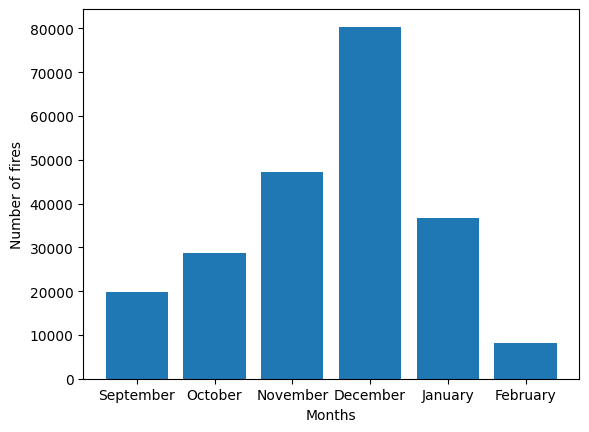

In [66]:
plt.bar(months.index, months.values)

plt.xlabel('Months')
plt.ylabel('Number of fires')

plt.show()

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    3. What is the average radiative power and fire pixel temperature for each month?
</p>

In [67]:
month_grp = df.groupby(['ground_month'])

In [68]:
avg_rp = month_grp['radiative_power'].mean().reindex(month_order)
avg_rp

ground_month
September     59.726805
October       78.167418
November      89.612335
December      94.668114
January      114.058893
February     110.113051
Name: radiative_power, dtype: float64

In [69]:
avg_fpt = month_grp['fire_px_temp'].mean().reindex(month_order)
avg_fpt

ground_month
September    58.307759
October      63.811120
November     63.633577
December     66.147792
January      68.217737
February     64.990600
Name: fire_px_temp, dtype: float64

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    4. What is the relationship between fire pixel temperature and radiative power?
</p>

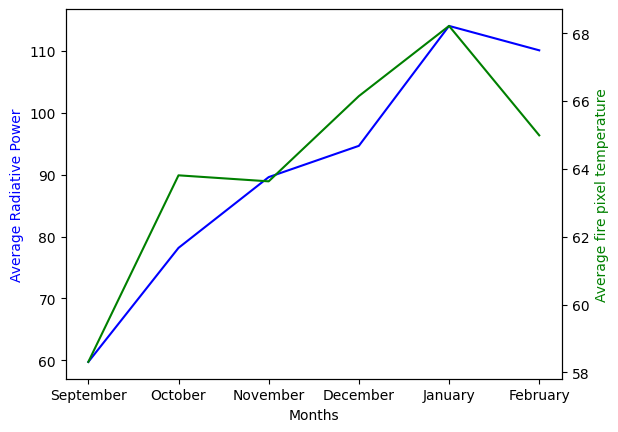

In [70]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(avg_rp.index, avg_rp.values, color='blue')
ax2.plot(avg_fpt.index, avg_fpt.values, color='green')

ax1.set_xlabel('Months')
ax1.set_ylabel('Average Radiative Power', color='blue')
ax2.set_ylabel('Average fire pixel temperature', color='green')

plt.show()

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    5. What is the difference in the average confidence of fire detections between daytime and night time observations?
</p>

In [71]:
daynight_grp = df.groupby(['daynight'])

In [72]:
daynight_grp['confidence'].mean()

daynight
day      75.441488
night    72.317043
Name: confidence, dtype: float64

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    6. Are bushfires more likely to be detected during the day or night?
</p>

In [73]:
df['daynight'].value_counts()

daynight
day      138955
night     81869
Name: count, dtype: int64

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    7. Which state had the fires with the highest average radiative power?
</p>

In [74]:
state_grp = df.groupby(['state'])

In [75]:
state_grp['radiative_power'].mean()

state
Australian Capital Territory    164.910395
New South Wales                  90.228977
Northern Territory               69.422684
Queensland                       52.798937
South Australia                 141.362204
Tasmania                         74.358002
Victoria                        109.369571
Western Australia               131.768387
Name: radiative_power, dtype: float64

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    8. Which satellite detected the most fires?
</p>

In [77]:
df['satellite'].value_counts()

satellite
Aqua     121226
Terra     99598
Name: count, dtype: int64

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    9. Create a heat map with a time slider showing all bush fires.

In [79]:
min_lon = 112
max_lon = 154
min_lat = -44
max_lat = -10

In [80]:
data = []
dates = []

for date, group in df.groupby(df['ground_date']):
    data.append(group[['latitude', 'longitude', 'fire_px_temp']].values.tolist())
    dates.append(date.strftime('%Y-%m-%d'))

m2 = folium.Map(
    max_bounds=True,
    min_lat=min_lat,
    max_lat=max_lat,
    min_lon=min_lon,
    max_lon=max_lon,
    min_zoom=4
)

HeatMapWithTime(
    data=data,
    index=dates,
    radius=2, 
    gradient={
        0.25: "yellow",
        0.5: "orange",
        0.75: "red",
        1.0: "purple"
    },  
).add_to(m2)

In [2]:
#m2

In [82]:
m2.save("heatmap_with_time.html")

<p style="font-size: 16px; color: #000000; font-weight: bold;">
    10. Create a comprehensive map showing all bush fires.

In [83]:
df['fire_px_temp'].describe()

count    220824.000000
mean         64.908796
std          28.016922
min          26.850000
25%          47.050000
50%          60.250000
75%          74.250000
max         233.850000
Name: fire_px_temp, dtype: float64

In [84]:
m = folium.Map(
    max_bounds=True,
    min_lat=min_lat,
    max_lat=max_lat,
    min_lon=min_lon,
    max_lon=max_lon,
    min_zoom=4
)

for index, row in df.iterrows():
    folium.CircleMarker(
        location = [row['latitude'], row['longitude']],
        radius = 1,
        tooltip = "Latitude: " + str(row['latitude']) + "<br> Longitude: " + str(row['longitude']) + "<br> Date: " + str(row['ground_date'].date()) + "<br> Temperature: " + str(round(row['fire_px_temp'], 2)) + "°C" + "<br> Radiative power: " + str(row['radiative_power']) + "MW" + "<br> Type: " + str(row['type']),
        color = (
                "#F8E605" if (row['fire_px_temp'] > 26.85 and row['fire_px_temp'] <= 47.15) else
                "#F89105" if (row['fire_px_temp'] > 47.15 and row['fire_px_temp'] <= 60.35) else
                "#EA2207" if (row['fire_px_temp'] > 60.35 and row['fire_px_temp'] <= 74.25) else
                "#620995"
                ),
        fill = True,
        fill_color = (
                "#F8E605" if (row['fire_px_temp'] > 26.85 and row['fire_px_temp'] <= 47.15) else
                "#F89105" if (row['fire_px_temp'] > 47.15 and row['fire_px_temp'] <= 60.35) else
                "#EA2207" if (row['fire_px_temp'] > 60.35 and row['fire_px_temp'] <= 74.25) else
                "#620995"
                ),
    ).add_to(m)

In [1]:
#m

In [86]:
m.save("comprehensive_fire_map.html")